In [72]:
!pip install tensorflow


In [73]:
!pip install protobuf==5.28.3


In [74]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [75]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [76]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training/PlantVillage",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [77]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Image Visualization

(32, 256, 256, 3)
[2 0 1 2 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0]


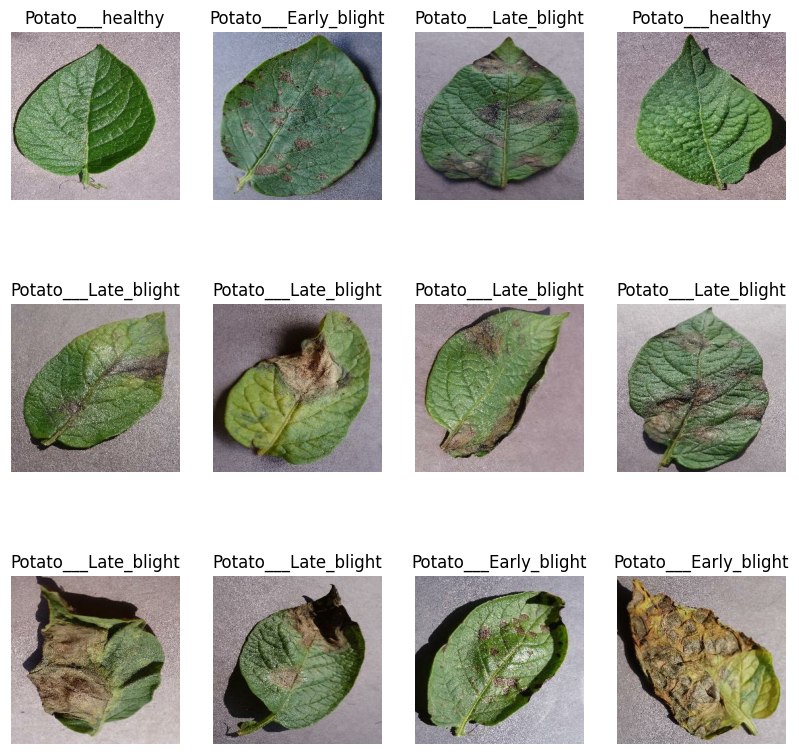

In [78]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in  range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

80% ==> Training
20% ==> test
    10% ==> Validation
    10% ==> actual_Test

In [79]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [80]:
train_ds = dataset.take(54)
len(train_ds)

54

In [81]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [82]:
val_size=0.1
len(dataset) * val_size

6.800000000000001

In [83]:
val_ds =test_ds.take(6)
len(val_ds)

6

In [84]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [85]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size = 10000): 
    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [86]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [87]:
len(train_ds)

54

In [88]:
len(val_ds)

6

In [89]:
len(test_ds)

8

In [90]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [91]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)##normalize this

[[[0.8509804  0.81960785 0.87058824]
  [0.85882354 0.827451   0.87058824]
  [0.8117647  0.7882353  0.8039216 ]
  ...
  [0.6117647  0.5882353  0.6039216 ]
  [0.62352943 0.6        0.6156863 ]
  [0.6        0.5764706  0.5921569 ]]

 [[0.84705883 0.8156863  0.8666667 ]
  [0.85882354 0.827451   0.87058824]
  [0.81960785 0.79607844 0.8117647 ]
  ...
  [0.57254905 0.54901963 0.5647059 ]
  [0.57254905 0.54901963 0.5647059 ]
  [0.5568628  0.53333336 0.54901963]]

 [[0.827451   0.79607844 0.84705883]
  [0.84705883 0.8156863  0.85882354]
  [0.8117647  0.7882353  0.8039216 ]
  ...
  [0.5764706  0.5529412  0.5686275 ]
  [0.5686275  0.54509807 0.56078434]
  [0.54901963 0.5254902  0.5411765 ]]

 ...

 [[0.69803923 0.6666667  0.65882355]
  [0.7058824  0.6745098  0.6666667 ]
  [0.7176471  0.6862745  0.6784314 ]
  ...
  [0.48235294 0.46666667 0.43137255]
  [0.5529412  0.53333336 0.50980395]
  [0.58431375 0.57254905 0.5529412 ]]

 [[0.7058824  0.6745098  0.6666667 ]
  [0.70980394 0.6784314  0.67058825]


In [92]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [93]:
data_augumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [94]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),   # ✅ define input once
    resize_and_rescale,
    data_augumentation,
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])



In [95]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [97]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 500ms/step - accuracy: 0.5828 - loss: 0.8091 - val_accuracy: 0.6458 - val_loss: 0.7274
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step - accuracy: 0.7662 - loss: 0.5614 - val_accuracy: 0.8542 - val_loss: 0.3828
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 383ms/step - accuracy: 0.8507 - loss: 0.3378 - val_accuracy: 0.8750 - val_loss: 0.3103
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.9068 - loss: 0.2351 - val_accuracy: 0.9531 - val_loss: 0.1281
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.8970 - loss: 0.2686 - val_accuracy: 0.9427 - val_loss: 0.1925
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - accuracy: 0.9311 - loss: 0.1801 - val_accuracy: 0.8646 - val_loss: 0.3769
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - accuracy: 0.9450 - loss: 0.1430 - val_accuracy: 0.9427 - val_loss: 0.1194
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - accuracy: 0.9635 - loss: 0.0999 - val_accu

In [98]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9727 - loss: 0.0686 


In [99]:
scores

[0.06861251592636108, 0.97265625]

In [102]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [105]:
len(history.history['accuracy'])

50

In [106]:
history.history['accuracy']

[0.5827546119689941,
 0.7662037014961243,
 0.8506944179534912,
 0.9068287014961243,
 0.8969907164573669,
 0.9311342835426331,
 0.9450231194496155,
 0.9635416865348816,
 0.9398148059844971,
 0.9658564925193787,
 0.9629629850387573,
 0.9646990895271301,
 0.9733796119689941,
 0.9739583134651184,
 0.9710648059844971,
 0.9785879850387573,
 0.9606481194496155,
 0.9780092835426331,
 0.9872685074806213,
 0.9577546119689941,
 0.9890046119689941,
 0.9814814925193787,
 0.9768518805503845,
 0.984375,
 0.9849537014961243,
 0.9855324029922485,
 0.9878472089767456,
 0.9826388955116272,
 0.9803240895271301,
 0.9930555820465088,
 0.9890046119689941,
 0.9895833134651184,
 0.9901620149612427,
 0.9884259104728699,
 0.9913194179534912,
 0.9947916865348816,
 0.9901620149612427,
 0.9918981194496155,
 0.9965277910232544,
 0.9959490895271301,
 0.9924768805503845,
 0.9936342835426331,
 0.9878472089767456,
 0.9918981194496155,
 0.9988425970077515,
 0.9855324029922485,
 0.9866898059844971,
 0.9959490895271301,
 0

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

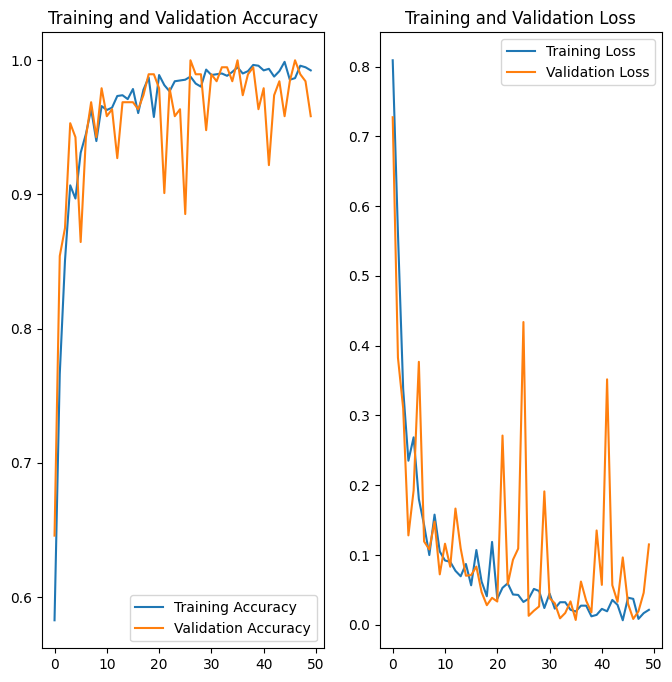

In [110]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Label: Potato___Late_blight


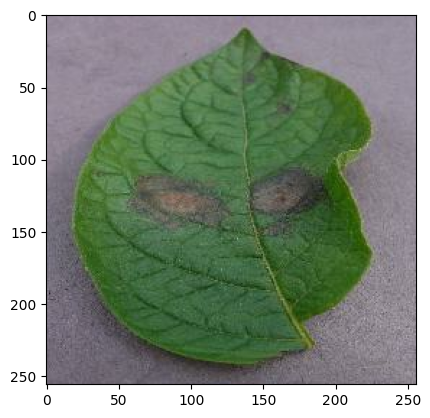

In [117]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
    

In [118]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)# create batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


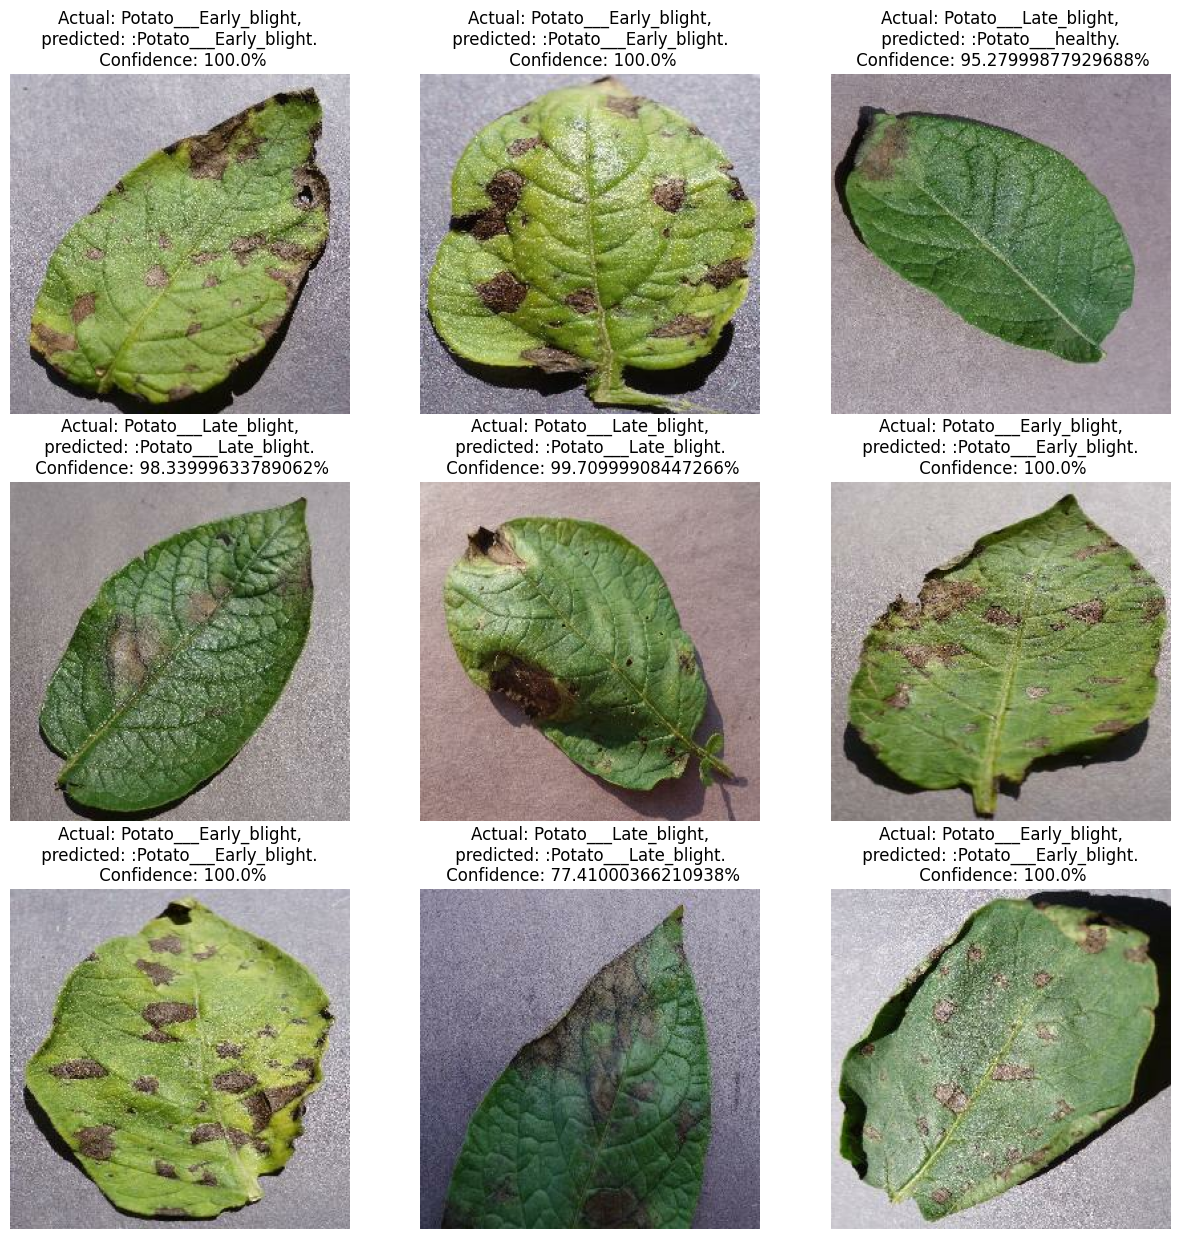

In [121]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,images[i].numpy())


        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n predicted: :{predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")
        


In [127]:
import os

# make sure the folder exists
os.makedirs("models", exist_ok=True)

model_version = 1

# ✅ save in the models folder with correct extension
model.save(f"models/{model_version}.keras")   # new keras format
# or
# model.save(f"models/{model_version}.h5")    # legacy format


In [129]:
os.listdir("models/")

['1.keras']

In [130]:
import os

# get all model filenames in folder
files = os.listdir("models/")

# remove extensions and convert to int
versions = [int(f.split(".")[0]) for f in files if f.endswith(".keras")]

# if folder is empty, set version = 1
if versions:
    model_version = max(versions) + 1
else:
    model_version = 1

print("Next model version:", model_version)


Next model version: 2


In [131]:
import os
import shutil

# folder where models are stored
models_dir = "models/"

# find all versions
files = [f for f in os.listdir(models_dir) if f.endswith(".keras")]
versions = [int(f.split(".")[0]) for f in files]

if not versions:
    raise ValueError("No models found to copy!")

# pick the latest version
latest_version = max(versions)

# new version number
new_version = latest_version + 1

# source and destination paths
src = os.path.join(models_dir, f"{latest_version}.keras")
dst = os.path.join(models_dir, f"{new_version}.keras")

# copy file
shutil.copy(src, dst)

print(f"Copied model {latest_version}.keras → {new_version}.keras")


Copied model 1.keras → 2.keras


In [133]:
import os

print(os.listdir("C:/pythonproject/potato-project"))


['.idea', '.ipynb_checkpoints', '.venv', 'api', 'Model-training.ipynb', 'models.config.example', 'saved_models', 'training']


In [135]:
import tensorflow as tf
import os

# Paths
base_dir = "C:/pythonproject/potato-project/saved_models"
output_dir = "C:/pythonproject/potato-project/saved_models/potatomodel"

# Make sure output folders exist
os.makedirs(output_dir, exist_ok=True)

# Convert 1.keras → TF SavedModel
model1 = tf.keras.models.load_model(os.path.join(base_dir, "1.keras"))
model1.export(os.path.join(output_dir, "1"))   # use export()

# Convert 2.keras → TF SavedModel
model2 = tf.keras.models.load_model(os.path.join(base_dir, "2.keras"))
model2.export(os.path.join(output_dir, "2"))   # use export()

print("✅ Conversion Done! Models saved in TF Serving format.")


INFO:tensorflow:Assets written to: C:/pythonproject/potato-project/saved_models/potatomodel\1\assets


INFO:tensorflow:Assets written to: C:/pythonproject/potato-project/saved_models/potatomodel\1\assets


Saved artifact at 'C:/pythonproject/potato-project/saved_models/potatomodel\1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2515126071760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126069648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126072528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126059280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126065424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126061392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126059472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126060624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126065616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126063312: TensorSpec(shape=(), dtype=tf.resource, name

INFO:tensorflow:Assets written to: C:/pythonproject/potato-project/saved_models/potatomodel\2\assets


Saved artifact at 'C:/pythonproject/potato-project/saved_models/potatomodel\2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2515126069456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126060048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126071376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126072720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126071568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126064272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126073296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515126069840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515128222928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2515128225040: TensorSpec(shape=(), dtype=tf.resource, name

In [136]:
import tensorflow as tf
import os

# Paths
base_dir = "C:/pythonproject/potato-project/saved_models"
output_dir = "C:/pythonproject/potato-project/saved_models/potatomodel"

# Make sure output folders exist
os.makedirs(output_dir, exist_ok=True)

# Save 1.keras into potatomodel
model1 = tf.keras.models.load_model(os.path.join(base_dir, "1.keras"))
model1.save(os.path.join(output_dir, "1.keras"))

# Save 2.keras into potatomodel
model2 = tf.keras.models.load_model(os.path.join(base_dir, "2.keras"))
model2.save(os.path.join(output_dir, "2.keras"))

print("✅ Models saved inside potatomodel folder in .keras format.")


✅ Models saved inside potatomodel folder in .keras format.
